# General Information
* Please do not copy and paste solutions from other people, I would hate to give you 0 points. 
* You must not turn this in later then Wednesday at midnight. After this you will not be able to upload the file and you will get 0 points
* Upload your results as a notebook with the title lastname_firstname_final.ipynb
* On Thursday and Friday you will present your code and results. This should take about 10 minutes, no powerpoint required. 
* Use comments. Code without or bad comments will lose points. You do not have to comment every line. Just think about what comments your future self might find helpful.
* You will get points for: 
    * a working solution (50 Points)
    * your explanation of your code in the presentation (40 Points)
    * good comments and code structure (5 Points)
    * solving the problem with pandas (5 Points)
* You can use this notebook for uploading or a python file, your choice. 
* The following tasks will make use of most things we learned in the course, so you should be able to do them all. They are possible without the use of pandas, but this will require a bit more elbow grease. 
* Do not start too late with this notebook. I guarantee you it will take some time.
* For reference, my solution has a around 80 lines of code (including imports, header, comments and empty lines). 
* If an exercise is unclear or you find any mistakes, please contact me.

## Important Hint
If you struggle with the tasks presented here, do not start banging your head against the wall. Take a step back, write down in normal english what you think your program should do. Then translate it to code. If you still struggle, take a look again at the exercises or look on the internet or books for new ones. Also, going for a walk and relaxing with something different like food or sports helps your head coming up with solution to programming problems on its own (just try it when you are stuck).

# Information about the Data
Together with this notebook I uploaded three files:
* a pdf describing a landcover classification system
* a txt file with a DEM and landcover information
* a txt containing interpolated rainfall information for the DEM over several years [mm/day]

## DEM/Land Cover File Structure
Latitude, Longitude, Elevation, Landcover Type

## Interpolated Rainfall File Structure
Rows contain the values for a given point over the whole time period. Columns contain the values for all points for a given day. The row layout is equal to the DEM file. This means that the first row of the rainfall file contains the rainfall timeseries for the whole timeperiod for the point in the first row of the DEM file. 

# Task 1
Read in the DEM/land cover file. Replace the rather detailed land cover classes with a more coarse classification. A sensible choice would be woods, .. and so forth. Save the results in a new file. Do not retain the old classification in the new file, do not overwrite the old file. 

In [7]:
import pandas as pd

# read the DEM/land cover file
filename = 'location_height_landcover.txt'
dem_file = pd.read_csv(filename, sep=' ', header=None, names=['Latitude', 'Longitude', 'Elevation', 'Landcover Type'])

# define the names of 5 classes of Landcover Type
classes = ['Built-up Areas', 'Agricultural Areas', 'Forests and Natural Areas', 'Moist Areas', 'Water Surfaces']

# keep only the column of Landcover Type that satisfies a condition
class1 = dem_file['Landcover Type'][dem_file['Landcover Type']<200]
class2 = dem_file['Landcover Type'][dem_file['Landcover Type']<300]
class3 = dem_file['Landcover Type'][dem_file['Landcover Type']<400]
class4 = dem_file['Landcover Type'][dem_file['Landcover Type']<500]
class5 = dem_file['Landcover Type'][dem_file['Landcover Type']<600]

# replace the name of the class in the column of Landcover Type
dem_file['Landcover Type'].replace(class1, classes[0], inplace=True)
dem_file['Landcover Type'].replace(class2, classes[1], inplace=True)
dem_file['Landcover Type'].replace(class3, classes[2], inplace=True)
dem_file['Landcover Type'].replace(class4, classes[3], inplace=True)
dem_file['Landcover Type'].replace(class5, classes[4], inplace=True)

# save into a new file
dem_file.to_csv('location_height_landcover_modified.txt', sep=' ', header=None, index=False, float_format='%.3f')


# Task 2
The data in the DEM/land cover file and the rainfall file are meant to be together, as they describe the same points. Therefore create a new file containing the information from the file you created in task 1 and the rainfall file. Due to an error in the calculations all rainfall data is also too big by a factor of ten. Fix this error (round to two digits). Save the results in a new file.

In [8]:
# read the modified DEM/land cover file
filename = 'location_height_landcover_modified.txt'
dem_file = pd.read_csv(filename, sep=' ', header=None, names=['Latitude', 'Longitude', 'Elevation', 'Landcover Type'])

# read the interpolated rainfall file
filename = 'interpolated_rainfall.txt'
inter_rain = pd.read_csv(filename, sep=' ', header=None)

# correct error of rainfall data by dividing with 10 and round to 2 digits
inter_rain = round(inter_rain/10.0, 2)

# concatenate files along columns
dem_rain = pd.concat([dem_file, inter_rain], axis=1)

# save the new dataframe into a new file
dem_rain.to_csv('dem_rain_combined.txt', sep=' ', header=None, index=False, float_format='%.2f')


# Task 3
Read in the file you created in task 2. Next create a timeseries containing a single rainfall value for every day for every combination of an elevation above or below 500 m and your landuse classes. Save the results in seperate files. In the end you should have two files for every landuse class you defined, one for the points above 500 m and one for the points below. One timeseries (e.g. wood above 500 m) could look something like this:

In [ ]:
# Your solution does not have to look exactly the same. This is just a made up example.

Index 	Wood above 500 m
Day 1 	0.2
Day 2 	0.5
Day 3 	1.0
Day 4 	0.7

In [11]:
import os

# read the combined interpolated rainfall file
filename = 'dem_rain_combined.txt'
index = ['Day'+str(i) for i in range(1,10958)]
dem_rain = pd.read_csv(filename, sep=' ', header=None, names=['Latitude', 'Longitude', 'Elevation', 'Landcover Type']+index)

# seperate data with elevation > 500m and <500m respectively
above_500 = dem_rain[dem_rain['Elevation']>500]
below_500 = dem_rain[dem_rain['Elevation']<=500]

# group data with elevation above 500m by Landcover Type 
above_500 = above_500.groupby('Landcover Type')
# find the mean of these data
rain_above_500 = above_500[index].mean()

# group data with elevation below 500m by Landcover Type
below_500 = below_500.groupby('Landcover Type')
# find mean of these data
rain_below_500 = below_500[index].mean()

# set path of files
path = os.getcwd()+ '/task3/'
#print(path)

for i in range(3):
    
    # take every class that contains all days
    above = rain_above_500.iloc[i,:]
    below = rain_below_500.iloc[i,:]

    # names of classes
    area = rain_above_500.index[i]

    # save one file for above 500m and one for below 500m. 
    above.to_csv(path+area +'_Above_500m.txt', sep=' ', header=[area + ' Above 500m' ], index=True, float_format='%.2f')
    below.to_csv(path+area +'_Below_500m.txt', sep=' ', header=[area + ' Below 500m'], index=True, float_format='%.2f')


# Task 4
Create a figure that shows the frequency distribution of the values for every time series you created in task 3 in a seperate subplot. Save the figure as a png and make certain you have a good data ink ratio and labelled everything correctly. 

Think about the different possibilities to display a frequency distribution. You should be able to give a short explanation for your choice of figure. Also, explain what insights the figure could give you.

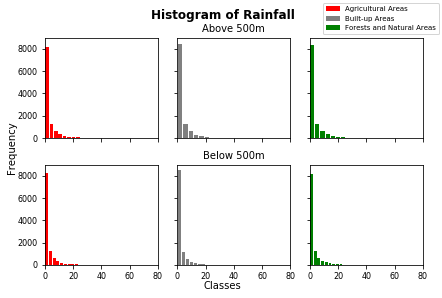

In [13]:
import matplotlib.pyplot as plt

df = []
path = os.getcwd()+ '/task3/'

# search all files in path and put them into df
for file in sorted(os.listdir(path)):
    df.append(pd.read_csv(path+file, sep=' ', header=0, index_col=0))

# start of plot
#--------------------
bins=20
titles = ['Agricultural Areas', 'Built-up Areas','Forests and Natural Areas']

# create the subplots
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True)

# main title of graph
fig.suptitle('Histogram of Rainfall', fontsize=12, fontweight='bold')

# common x,y axes' titles
fig.text(0.5, 0.01, 'Classes', ha='center')
fig.text(0.001, 0.5, 'Frequency', va='center', rotation='vertical')

# loop for all subplots
for j in range(3):
    for i in range(2):
        if j==0:
            
            # create two histograms of the 1st column
            ax[i,j].hist(x=df[i+j].values, bins=bins, rwidth=0.8, color='red')

            # set limits of x axis
            ax[i,j].set_xlim(0,80) 
            # set fontsize of x, y labels
            ax[i,j].xaxis.set_tick_params(labelsize=8)
            ax[i,j].yaxis.set_tick_params(labelsize=8)
            
        elif j==1:
            
            # create two histograms of the 2nd column
            ax[i,j].hist(x=df[i+j+1].values, bins=bins, rwidth=0.8, color='grey')
            
            # set limits of x axis
            ax[i,j].set_xlim(0,80)
            # set fontsize of x, y labels
            ax[i,j].xaxis.set_tick_params(labelsize=8)
            ax[i,j].yaxis.set_tick_params(labelsize=8)
            
            # set titles for the first and second row of plots
            if i==0:
                ax[i,j].set_title('Above 500m', fontsize=10)
            elif i==1:
                ax[i,j].set_title('Below 500m', fontsize=10)
           
        elif j==2:
            
            # create two histograms of the 3rd column
            ax[i,j].hist(x=df[i+j+2].values, bins=bins, rwidth=0.8, color='green')
            
            # set limits of x axis
            ax[i,j].set_xlim(0,80)
            # set fontsize of x, y labels
            ax[i,j].xaxis.set_tick_params(labelsize=8)
            ax[i,j].yaxis.set_tick_params(labelsize=8)

# set legend for plot         
fig.legend(titles, loc='upper right', fontsize=7)

# correct potential crops
fig.tight_layout()
# shift title to the top
fig.subplots_adjust(top=0.88)

# save plot 
plt.savefig('Histogram_of_Rainfall.png', dpi=300, bbox_inches="tight")
